This notebook executes the following steps on the PubMed dataset:
1. Load gene, disease, chemical, species embeddings from NCMF and DFMF
2. Load labels for diseases from original benchmark dataset
3. Make k clusters of the disease embeddings from the above files
4. Choose top e label entities that are relevant in each cluster 
5. Plt distribution of label entities in each cluster
6. Calculate silhouette score and ARI score
7. Visualize clusters using hypertools
8. Visualize groups based on existing labels

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
disease_clusters = 4
tope = 3

#### Step 1 - Load embeddings for NCMF and DFMF

In [3]:
def load(emb_file_path):
    emb_dict = {}
    with open(emb_file_path, 'r') as emb_file:
        for i, line in enumerate(emb_file):
            if i == 0:
                train_para = line[:-1]
            else:
                index, emb = line[:-1].split('\t')
                emb_dict[index] = np.array(emb.split()).astype(np.float32)

    return train_para, emb_dict

In [4]:
ncmf_emb_file = "../datasets/NCMF/PubMed/emb_sample_1.dat"
dfmf_emb_file = "../scikit-fusion/experiments/dfmf_s1_emb_pubmed.dat"
dcmf_emb_file = "../DCMF/experiments/emb_PubMed_sample_1.dat"
cmf_emb_file = "../CMF/experiments/cmf_s1_emb_pubmed.dat"
gcmf_emb_file = "../CMF/experiments/gcmf_s1_emb_pubmed.dat"

In [5]:
train_para, emb_dict = load(ncmf_emb_file)

In [6]:
train_para_dfmf, emb_dict_dfmf = load(dfmf_emb_file)

In [7]:
train_para_dcmf, emb_dict_dcmf = load(dcmf_emb_file)
train_para_cmf, emb_dict_cmf = load(cmf_emb_file)
train_para_gcmf, emb_dict_gcmf = load(gcmf_emb_file)

In [8]:
print(emb_dict['0'].shape)
print(emb_dict_dcmf['0'].shape)
print(emb_dict_cmf['1'].shape)
print(emb_dict_gcmf['1'].shape)

(100,)
(100,)
(50,)
(50,)


#### Step 2  - Load labels for all diseases

In [9]:
labels_df = pd.read_csv("../datasets/NCMF/PubMed/sampled1_label.dat", sep="\t", header=None)
labels_df.columns = ["disease_emb_idx", "disease_name", "node_type", "label"]
print(labels_df.shape)
labels_df.head()

(241, 4)


,disease_emb_idx,disease_name,node_type,label
0,5381,seminomas,1,7
1,5428,skin_disorders,1,6
2,5551,deprivations,1,5
3,5598,Thyrotoxicosis,1,1
4,5502,Helminthiasis,1,1


#### Step 3 - Map disease embeddings and cluster

In [10]:
import hypertools as hyp

In [11]:
labels_df["ncmf_emb"] = labels_df["disease_emb_idx"].apply(lambda x: emb_dict[str(x)])
labels_df["dfmf_emb"] = labels_df["disease_emb_idx"].apply(lambda x: emb_dict_dfmf[str(x)])
labels_df["dcmf_emb"] = labels_df["disease_emb_idx"].apply(lambda x: emb_dict_dcmf[str(x)])
labels_df["cmf_emb"] = labels_df["disease_emb_idx"].apply(lambda x: emb_dict_cmf[str(x + 1)])
labels_df["gcmf_emb"] = labels_df["disease_emb_idx"].apply(lambda x: emb_dict_gcmf[str(x + 1)])

In [12]:
labels_df[[f"emb_ncmf_{i}" for i in range(100)]] = pd.DataFrame(labels_df.ncmf_emb.tolist(), index= labels_df.index)
labels_df[[f"emb_dfmf_{i}" for i in range(50)]] = pd.DataFrame(labels_df.dfmf_emb.tolist(), index= labels_df.index)
labels_df[[f"emb_dcmf_{i}" for i in range(100)]] = pd.DataFrame(labels_df.dcmf_emb.tolist(), index= labels_df.index)
labels_df[[f"emb_cmf_{i}" for i in range(50)]] = pd.DataFrame(labels_df.cmf_emb.tolist(), index= labels_df.index)
labels_df[[f"emb_gcmf_{i}" for i in range(50)]] = pd.DataFrame(labels_df.gcmf_emb.tolist(), index= labels_df.index)

In [13]:
labels_df["ncmf_clusters"] = hyp.cluster(labels_df[[f"emb_ncmf_{i}" for i in range(100)]], n_clusters=disease_clusters)
labels_df["dfmf_clusters"] = hyp.cluster(labels_df[[f"emb_dfmf_{i}" for i in range(50)]], n_clusters=disease_clusters)
labels_df["dcmf_clusters"] = hyp.cluster(labels_df[[f"emb_dcmf_{i}" for i in range(100)]], n_clusters=disease_clusters)
labels_df["cmf_clusters"] = hyp.cluster(labels_df[[f"emb_cmf_{i}" for i in range(50)]], n_clusters=disease_clusters)
labels_df["gcmf_clusters"] = hyp.cluster(labels_df[[f"emb_gcmf_{i}" for i in range(50)]], n_clusters=disease_clusters)

In [14]:
labels_df.head()

,disease_emb_idx,disease_name,node_type,label,ncmf_emb,dfmf_emb,dcmf_emb,cmf_emb,gcmf_emb,emb_ncmf_0,...,emb_gcmf_45,emb_gcmf_46,emb_gcmf_47,emb_gcmf_48,emb_gcmf_49,ncmf_clusters,dfmf_clusters,dcmf_clusters,cmf_clusters,gcmf_clusters
0,5381,seminomas,1,7,"[0.039218076, -0.10880231, -0.11040516, -0.142...","[9.168477e-06, 1.0043364e-05, 9.7526345e-06, 9...","[-0.0040499615, -0.079954244, -0.02527629, 0.0...","[0.36665744, -0.70602626, 0.15052007, -0.21628...","[0.7071266, -0.2261474, -0.15311117, -0.409303...",0.039218,...,0.556046,0.569458,-0.410925,0.061749,0.387311,0,0,0,2,1
1,5428,skin_disorders,1,6,"[0.04371442, -0.10804627, -0.11262052, -0.1476...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.0040502157, -0.07995368, -0.025276173, 0.0...","[0.59546715, 0.06316175, -0.107499525, 0.24771...","[-0.236532, -0.071145035, -0.34386808, 0.92683...",0.043714,...,-0.333583,-0.111507,-0.252665,0.344557,-0.353011,0,0,0,3,1
2,5551,deprivations,1,5,"[0.039074566, -0.10814933, -0.10505157, -0.154...","[9.239907e-06, 1.0170687e-05, 9.763689e-06, 9....","[-0.004050037, -0.079954356, -0.025276253, 0.0...","[0.41201326, -0.077316105, 0.20223369, -0.0685...","[-0.029424367, 0.77552223, 0.09477476, 0.09763...",0.039075,...,-0.445432,-0.350428,-0.633141,0.557396,0.019915,0,0,0,3,2
3,5598,Thyrotoxicosis,1,1,"[0.059308853, -0.13439126, -0.13757455, -0.170...","[6.1049013e-06, 3.1111692e-06, 8.340742e-06, 5...","[-0.0040501663, -0.07995446, -0.025276102, 0.0...","[-0.29483974, -0.12810852, -0.0058772024, 0.63...","[-0.05437758, -0.6633611, -0.18252818, -0.9043...",0.059309,...,0.501628,-0.253000,0.058249,0.098042,-0.052049,2,0,0,2,2
4,5502,Helminthiasis,1,1,"[0.036177903, -0.105292745, -0.11135381, -0.14...","[0.0010293882, 0.0026271737, 0.00016782607, 0....","[-0.0040503815, -0.07995407, -0.025276044, 0.0...","[-0.18512802, -0.23811783, 0.25528032, -0.4919...","[-0.041436747, 0.45704305, 0.8910488, 0.391075...",0.036178,...,-0.722274,0.022574,0.047068,0.764854,-0.055105,0,0,0,0,0


In [15]:
# KMeans on PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=5, random_state=42)
pca_ncmf = pca.fit_transform(labels_df[[f"emb_ncmf_{i}" for i in range(100)]])
pca_dfmf = pca.fit_transform(labels_df[[f"emb_dfmf_{i}" for i in range(50)]])
pca_dcmf = pca.fit_transform(labels_df[[f"emb_dcmf_{i}" for i in range(100)]])
pca_cmf = pca.fit_transform(labels_df[[f"emb_cmf_{i}" for i in range(50)]])
pca_gcmf = pca.fit_transform(labels_df[[f"emb_gcmf_{i}" for i in range(50)]])
print(pca_ncmf.shape)
print(pca_dfmf.shape)
print(pca_dcmf.shape)
print(pca_cmf.shape)
print(pca_gcmf.shape)

(241, 5)
(241, 5)
(241, 5)
(241, 5)
(241, 5)


In [16]:
labels_df["ncmf_clusters_pca"] = hyp.cluster(pca_ncmf, n_clusters=disease_clusters)
labels_df["dfmf_clusters_pca"] = hyp.cluster(pca_dfmf, n_clusters=disease_clusters)
labels_df["dcmf_clusters_pca"] = hyp.cluster(pca_dcmf, n_clusters=disease_clusters)
labels_df["cmf_clusters_pca"] = hyp.cluster(pca_cmf, n_clusters=disease_clusters)
labels_df["gcmf_clusters_pca"] = hyp.cluster(pca_gcmf, n_clusters=disease_clusters)

#### Step 4 - Get top entities in each cluster

In [17]:
tope_labels_ncmf = {}
tope_labels_dfmf = {}
for i in range(disease_clusters):
    tope_labels_ncmf[i] = labels_df[labels_df.ncmf_clusters == i]["label"].value_counts()[:tope].to_dict()
    tope_labels_dfmf[i] = labels_df[labels_df.dfmf_clusters == i]["label"].value_counts()[:tope].to_dict()
print(tope_labels_ncmf)
print(tope_labels_dfmf)

{0: {4: 42, 0: 28, 5: 26}, 1: {6: 2, 5: 1, 4: 1}, 2: {1: 9, 4: 7, 0: 7}, 3: {5: 1}}
{0: {4: 48, 0: 34, 5: 31}, 1: {5: 1}, 2: {5: 1, 4: 1, 3: 1}, 3: {1: 2, 7: 1, 6: 1}}


#### Step 5 - Plot distributions of entities in each cluster

In [18]:
offset = 0.17
from matplotlib import colors
from matplotlib.lines import Line2D
bar_colors = ["darkblue", "darkorange", "sienna", "darkred", "salmon", "darkgreen", "black", "darkviolet"]
custom_lines = [Line2D([0], [0], color=c, lw=4) for c in bar_colors]

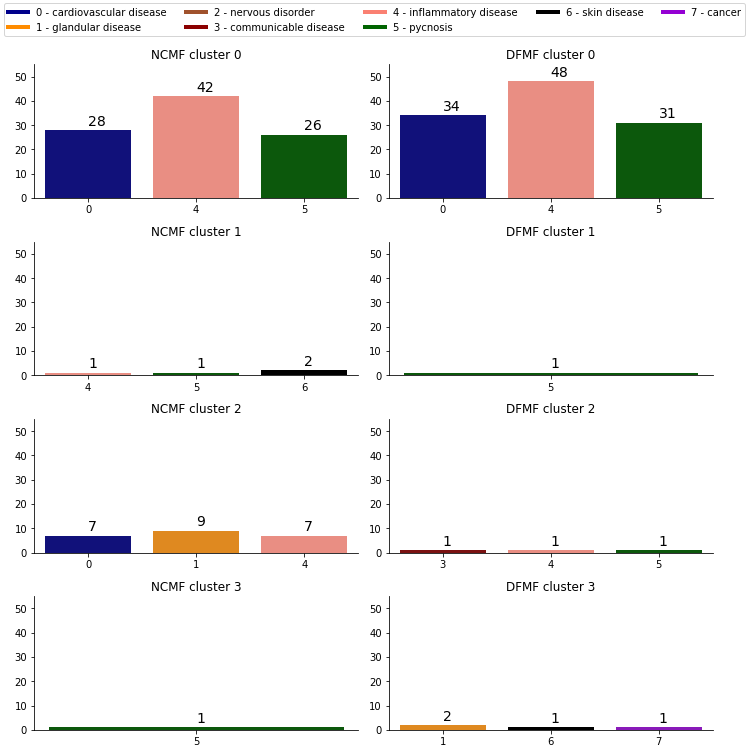

In [19]:
fig, ax = plt.subplots(disease_clusters, 2, figsize=(10,10))
for i in range(disease_clusters):
    pal=[]
    for b in range(len(bar_colors)):
        if b in list(sorted(tope_labels_ncmf[i].keys())):
            pal.append(bar_colors[b])
    sns.barplot(x = list(tope_labels_ncmf[i].keys()), y = list(tope_labels_ncmf[i].values()), ax = ax[i][0], palette=pal)
    ax[i][0].set_title(f"NCMF cluster {i}")
    ax[i][0].set_ylim(0, 55)
    x_list = list(sorted(tope_labels_ncmf[i].keys()))
    y_list = [tope_labels_ncmf[i][k] for k in x_list]
    for j in range(len(y_list)):
        ax[i][0].text(j, y_list[j]+2, str(y_list[j]), fontsize=14)
    ax[i][0].spines['top'].set_visible(False)
    ax[i][0].spines['right'].set_visible(False)
    pal=[]
    pal=[]
    for b in range(len(bar_colors)):
        if b in list(sorted(tope_labels_dfmf[i].keys())):
            pal.append(bar_colors[b])
    sns.barplot(x = list(tope_labels_dfmf[i].keys()), y = list(tope_labels_dfmf[i].values()), ax = ax[i][1], palette=pal)
    ax[i][1].set_title(f"DFMF cluster {i}")
    ax[i][1].set_ylim(0, 55)
    x_list = list(sorted(tope_labels_dfmf[i].keys()))
    y_list = [tope_labels_dfmf[i][k] for k in x_list]
    for j in range(len(y_list)):
        ax[i][1].text(j, y_list[j]+2, str(y_list[j]), fontsize=14)
    ax[i][1].spines['top'].set_visible(False)
    ax[i][1].spines['right'].set_visible(False)
fig.legend(custom_lines, ["0 - cardiovascular disease", "1 - glandular disease", "2 - nervous disorder", "3 - communicable disease", \
            "4 - inflammatory disease", "5 - pycnosis", "6 - skin disease", "7 - cancer"],\
          bbox_to_anchor = (0.52,1.02), loc="center", ncol=5)
plt.tight_layout()
# plt.savefig("PubMed_cluster_label_distribution.png", bbox_inches="tight")

#### Step 6 - Calculate scores - silhouette and ARI

In [20]:
from sklearn.metrics import adjusted_rand_score, silhouette_score

In [21]:
print(f"NCMF adjusted rand score = {adjusted_rand_score(labels_df['label'], labels_df['ncmf_clusters'])}")
print(f"DFMF adjusted rand score = {adjusted_rand_score(labels_df['label'], labels_df['dfmf_clusters'])}")
print(f"DCMF adjusted rand score = {adjusted_rand_score(labels_df['label'], labels_df['dcmf_clusters'])}")
print(f"CMF adjusted rand score = {adjusted_rand_score(labels_df['label'], labels_df['cmf_clusters'])}")
print(f"gCMF adjusted rand score = {adjusted_rand_score(labels_df['label'], labels_df['gcmf_clusters'])}")

NCMF adjusted rand score = 0.002344898972250166
DFMF adjusted rand score = 0.0008538723551865633
DCMF adjusted rand score = 0.0043499600016368625
CMF adjusted rand score = -0.0027777627126716067
gCMF adjusted rand score = 0.00013756749201333581


In [22]:
# PCA scores
print(f"NCMF adjusted rand score = {adjusted_rand_score(labels_df['label'], labels_df['ncmf_clusters_pca'])}")
print(f"DFMF adjusted rand score = {adjusted_rand_score(labels_df['label'], labels_df['dfmf_clusters_pca'])}")
print(f"DCMF adjusted rand score = {adjusted_rand_score(labels_df['label'], labels_df['dcmf_clusters_pca'])}")
print(f"CMF adjusted rand score = {adjusted_rand_score(labels_df['label'], labels_df['cmf_clusters_pca'])}")
print(f"gCMF adjusted rand score = {adjusted_rand_score(labels_df['label'], labels_df['gcmf_clusters_pca'])}")

NCMF adjusted rand score = 0.001557529307292065
DFMF adjusted rand score = 0.0002936782430808431
DCMF adjusted rand score = 0.0043499600016368625
CMF adjusted rand score = 0.0021765217505295446
gCMF adjusted rand score = 0.0071917663888431725


In [23]:
print(f"NCMF silhoeutte score for {disease_clusters} clusters = {silhouette_score(labels_df[[f'emb_ncmf_{i}' for i in range(100)]], labels_df['ncmf_clusters'])}")
print(f"DFMF silhoeutte score for {disease_clusters} clusters = {silhouette_score(labels_df[[f'emb_dfmf_{i}' for i in range(50)]], labels_df['dfmf_clusters'])}")

NCMF silhoeutte score for 4 clusters = 0.6566465967004971
DFMF silhoeutte score for 4 clusters = 0.8688619544322023


#### Step 7 - Visualize clusters using hypertools

/home/ajayago/anaconda3/envs/ncmf/lib/python3.7/site-packages/hypertools/plot/plot.py:250: UserWarning: Group will be deprecated. Please use hue keyword argument. See docs for details: http://hypertools.readthedocs.io/en/latest/hypertools.plot.html#hypertools.plot
  warnings.warn('Group will be deprecated. Please use '
/home/ajayago/anaconda3/envs/ncmf/lib/python3.7/site-packages/hypertools/plot/plot.py:250: UserWarning: Group will be deprecated. Please use hue keyword argument. See docs for details: http://hypertools.readthedocs.io/en/latest/hypertools.plot.html#hypertools.plot
  warnings.warn('Group will be deprecated. Please use '


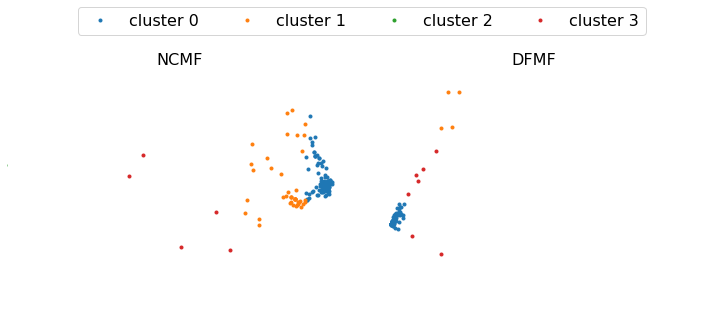

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))
# fig.suptitle("Clusters for disease labels", y = 1.1)
hyp.plot(labels_df[[f"emb_ncmf_{i}" for i in range(100)]], ".", group=labels_df["ncmf_clusters"], ndims=2, ax=ax[0])
ax[0].set_title("NCMF", fontsize=16)
ax[0].set_ylim(0.5,0.99)
ax[0].set_xlim(-0.99, 0.99)
hyp.plot(labels_df[[f"emb_dfmf_{i}" for i in range(50)]], ".", group=labels_df["dfmf_clusters"], ndims=2, ax=ax[1])
ax[1].set_title("DFMF", fontsize=16)
ax[1].set_ylim(-0.99,-0.5)
ax[1].set_xlim(-0.99, 0.99)
plt.legend(["cluster 0", "cluster 1", "cluster 2", "cluster 3"], bbox_to_anchor = (0, 1.2), loc="center", ncol=4, fontsize=16)
# plt.savefig("PubMed_cluster_scatterplot.png", bbox_inches="tight")

/home/ajayago/anaconda3/envs/ncmf/lib/python3.7/site-packages/hypertools/plot/plot.py:250: UserWarning: Group will be deprecated. Please use hue keyword argument. See docs for details: http://hypertools.readthedocs.io/en/latest/hypertools.plot.html#hypertools.plot
  warnings.warn('Group will be deprecated. Please use '
/home/ajayago/anaconda3/envs/ncmf/lib/python3.7/site-packages/hypertools/plot/plot.py:250: UserWarning: Group will be deprecated. Please use hue keyword argument. See docs for details: http://hypertools.readthedocs.io/en/latest/hypertools.plot.html#hypertools.plot
  warnings.warn('Group will be deprecated. Please use '


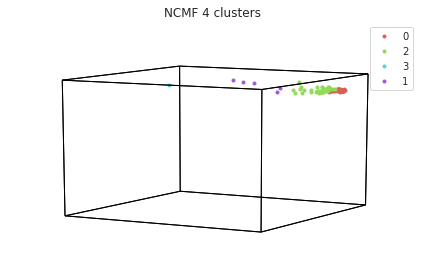

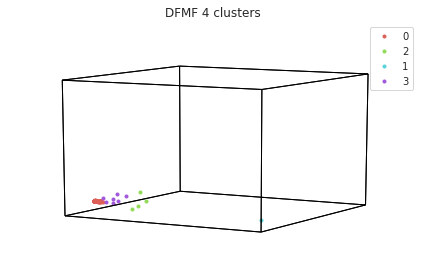

In [25]:
# fig, ax = plt.subplots(1, 2, figsize=(10,5))
# fig.suptitle("Clusters for disease labels", y = 1.05)
hyp.plot(labels_df[[f"emb_ncmf_{i}" for i in range(100)]], ".", group=labels_df["ncmf_clusters"], ndims=3, title=f"NCMF {disease_clusters} clusters", legend=list(labels_df["ncmf_clusters"].unique()))
hyp.plot(labels_df[[f"emb_dfmf_{i}" for i in range(50)]], ".", group=labels_df["dfmf_clusters"], ndims=3, title=f"DFMF {disease_clusters} clusters", legend=list(labels_df["dfmf_clusters"].unique()))

#### Step 8 - Visualize existing labels

/home/ajayago/anaconda3/envs/ncmf/lib/python3.7/site-packages/hypertools/plot/plot.py:250: UserWarning: Group will be deprecated. Please use hue keyword argument. See docs for details: http://hypertools.readthedocs.io/en/latest/hypertools.plot.html#hypertools.plot
  warnings.warn('Group will be deprecated. Please use '
/home/ajayago/anaconda3/envs/ncmf/lib/python3.7/site-packages/hypertools/plot/plot.py:250: UserWarning: Group will be deprecated. Please use hue keyword argument. See docs for details: http://hypertools.readthedocs.io/en/latest/hypertools.plot.html#hypertools.plot
  warnings.warn('Group will be deprecated. Please use '


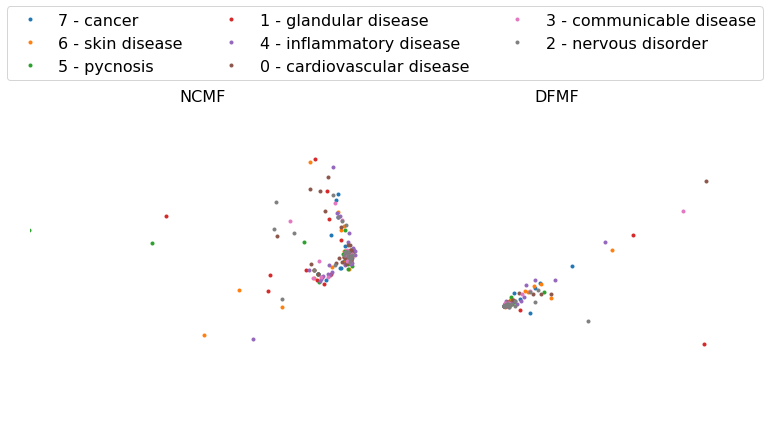

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))
# fig.suptitle("Groups for disease labels", y = 1.15)
hyp.plot(labels_df[[f"emb_ncmf_{i}" for i in range(100)]], ".", group=labels_df["label"], ndims=2, ax=ax[0])
ax[0].set_title("NCMF", fontsize=16)
ax[0].set_ylim(0.5,0.99)
ax[0].set_xlim(-0.99, 0.99)

hyp.plot(labels_df[[f"emb_dfmf_{i}" for i in range(50)]], ".", group=labels_df["label"], ndims=2, ax=ax[1], legend=list(labels_df["label"].unique()))
ax[1].set_title("DFMF", fontsize=16)
ax[1].set_ylim(-0.99,-0.5)
ax[1].set_xlim(-0.99, -0.5)
labels = ["7 - cancer", "6 - skin disease", "5 - pycnosis", "1 - glandular disease", "4 - inflammatory disease", "0 - cardiovascular disease",\
"3 - communicable disease", "2 - nervous disorder"]
plt.legend(labels, bbox_to_anchor = (0, 1.2), loc="center", ncol=3, fontsize=16)
# plt.savefig("PubMed_actual_label_scatterplot.png", bbox_inches="tight")